## Explorated data analisys for Diabetis dataset. This Jupyter have:

1. Libraries and funtions to used
2. Load data
3. Explore completitud and accuracy data.
4. Clean data for exploration
5. Exploration data
6. Conclusions

## Libraries and funtions to used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from utils import processing_data
from utils import plots_eda
print(sns.__version__)

0.12.2


## Load Data

In [2]:
diabetes = pd.read_csv('../dataset_diabetes/diabetic_data.csv')
# admitission_description=pd.read_csv('../dataset_diabetes/IDs_mapping.csv')

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Explore completitud and accuracy data.

### Nulls information

 At first glance, the data set does not bring null values, however, on occasions they may present errors in the content.

In [5]:
process_class= processing_data(diabetes)
process_class.nulls_percent(diabetes)

,column_name,percent_missing
encounter_id,encounter_id,0.0
troglitazone,troglitazone,0.0
chlorpropamide,chlorpropamide,0.0
glimepiride,glimepiride,0.0
acetohexamide,acetohexamide,0.0
glipizide,glipizide,0.0
glyburide,glyburide,0.0
tolbutamide,tolbutamide,0.0
pioglitazone,pioglitazone,0.0
rosiglitazone,rosiglitazone,0.0


### Accuracy data

 Explore category columns

It is found that some columns bring characters like '?' for null data.

In [6]:
for i in diabetes.columns:
    if diabetes[i].dtype in (str, object):
        print('\n categorys for {}'.format(i))
        print(diabetes[i].value_counts())
        


 categorys for race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

 categorys for gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

 categorys for age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

 categorys for weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

 categorys for payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP      

In [7]:
diabetes = diabetes.replace('?', np.nan)
diabetes = diabetes.replace('Unknown/Invalid', np.nan)
diabetes = diabetes.replace('None', np.nan)

There is a failure in the precision of the data greater than 10% in the columns of: weight, max_glu_serum, A1Cresult and medical_specialtyz.

There are also failures of less than 10% in the columns: diag_1, diag_2, diag_3 and gender

In [8]:
process_class.nulls_percent(diabetes)

,column_name,percent_missing
weight,weight,96.858479
max_glu_serum,max_glu_serum,94.746772
A1Cresult,A1Cresult,83.277322
medical_specialty,medical_specialty,49.082208
payer_code,payer_code,39.557416
race,race,2.233555
diag_3,diag_3,1.398306
diag_2,diag_2,0.351787
diag_1,diag_1,0.020636
gender,gender,0.002948


In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101763 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Exploration data

### Target column

Is envident that dataset have imbalence in objetive column. more from 50% from persons aren't readmitted

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7120\2990781531.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(handles, labels = labels)


<Axes: ylabel='readmitted'>

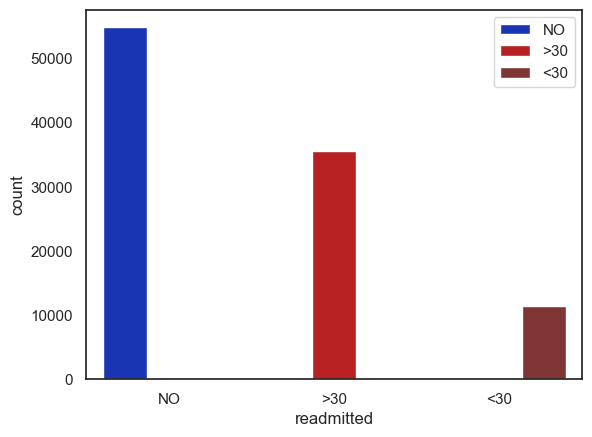

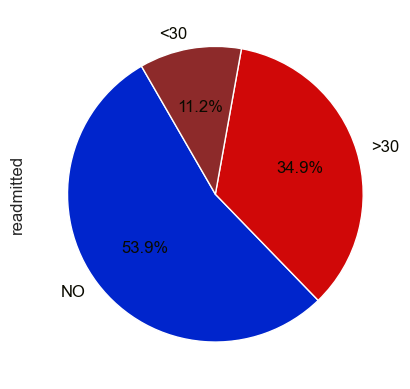

In [10]:
##  Imbalance target column
plt.figure()
sns.set_theme(style="white")
ax = sns.countplot(x = 'readmitted', data = diabetes, hue = 'readmitted', palette=['#0025CC',"#D00808","#8D2A2A"])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels = labels)
plt.figure()
diabetes.readmitted.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,colors=['#0025CC',"#D00808","#8D2A2A"],
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})

### Categorical explore data

In [ ]:
categorical_columns=[]
for i in diabetes.columns:
    if diabetes[i].dtype in [object]:
        categorical_columns.append(i)

In [54]:
len(diabetes['medical_specialty'].unique())

73

In [58]:
diabetes['medical_specialty'].value_counts()
for i in diabetes[categorical_columns].columns:
    number_cat= len(diabetes[i].unique())
    if number_cat>10:
        print('{} have {} unique data'.format(i, number_cat))


payer_code have 18 unique data
medical_specialty have 73 unique data
diag_1 have 717 unique data
diag_2 have 749 unique data
diag_3 have 790 unique data


In general all categorical columns have balence, the columns medical_speciality and diag_1, diag_2, diag_3 have many dimentinality. Is necesary transfrom in more lower data.

In [26]:

plots_class= plots_eda(diabetes)

<Figure size 640x480 with 0 Axes>

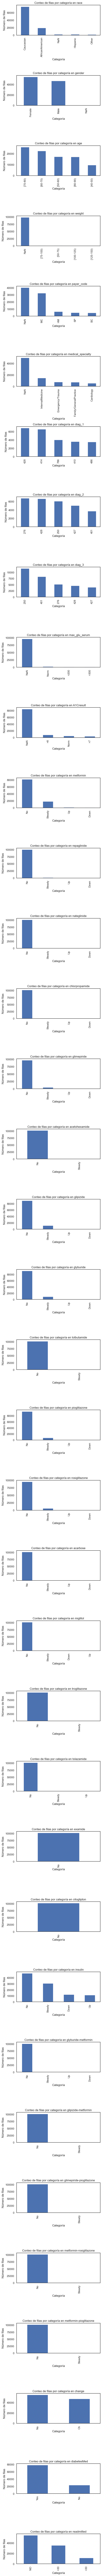

In [29]:
plt.figure()
plots_class.plots_categorical_bars()

### Numerical explore data

Any columns have many outliers, in general is necesary standarization for problems from ouilers. Other posibble is delete rows with this problemms

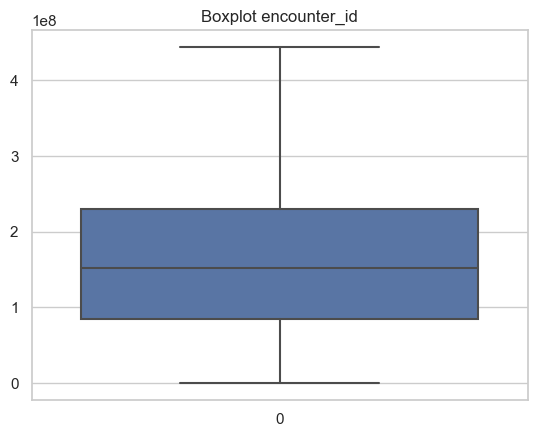

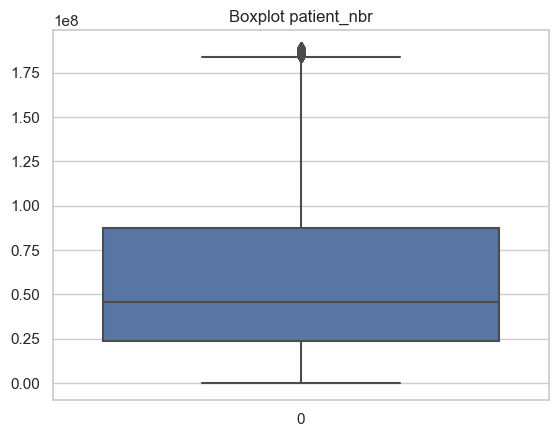

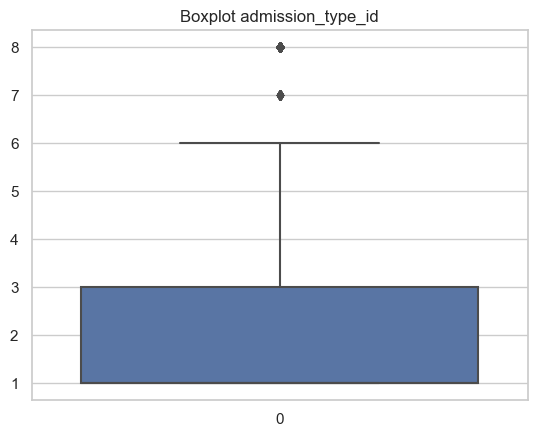

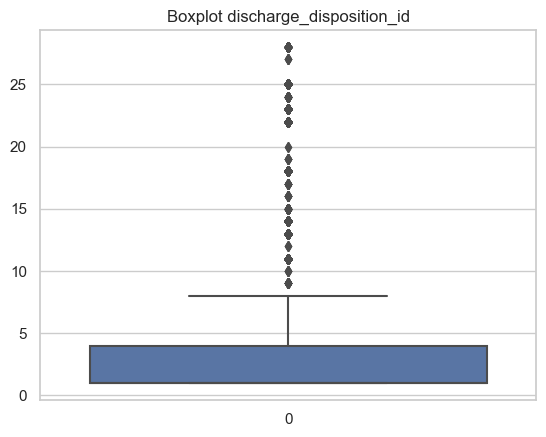

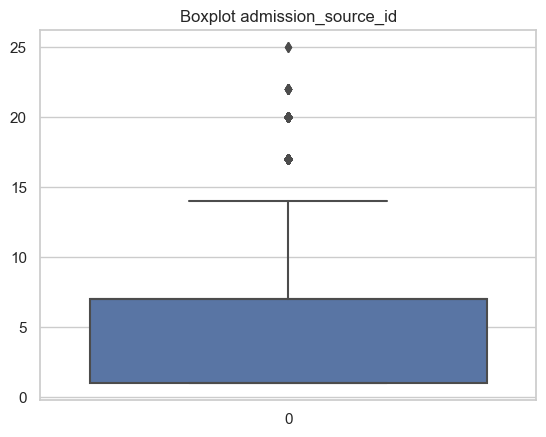

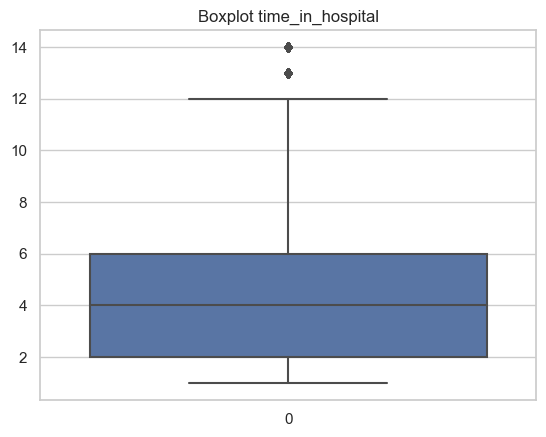

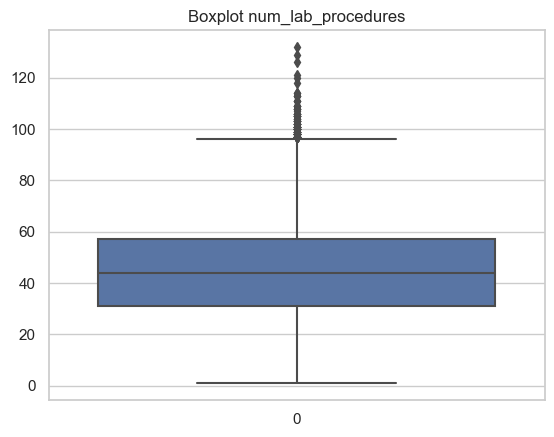

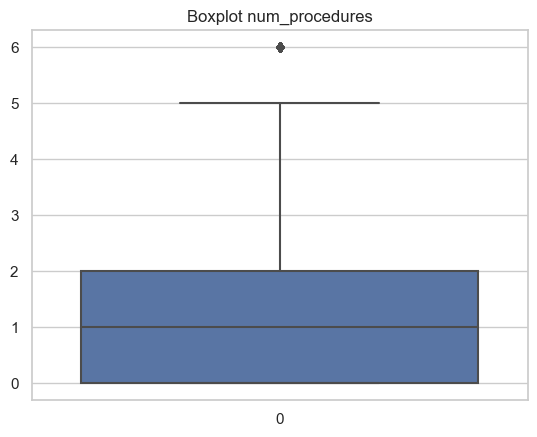

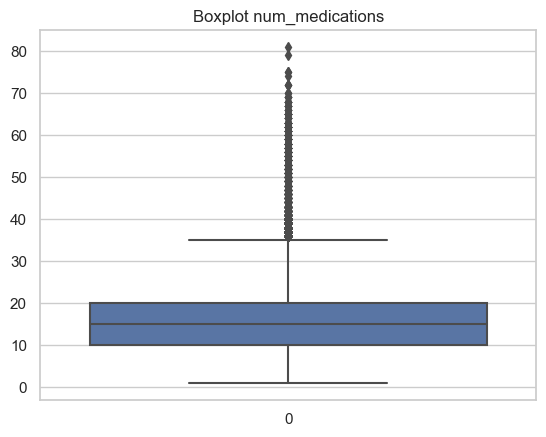

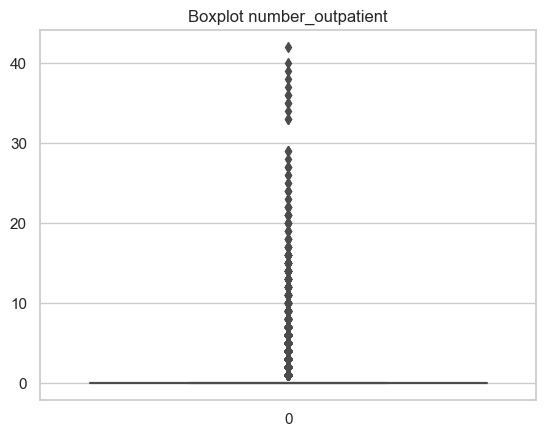

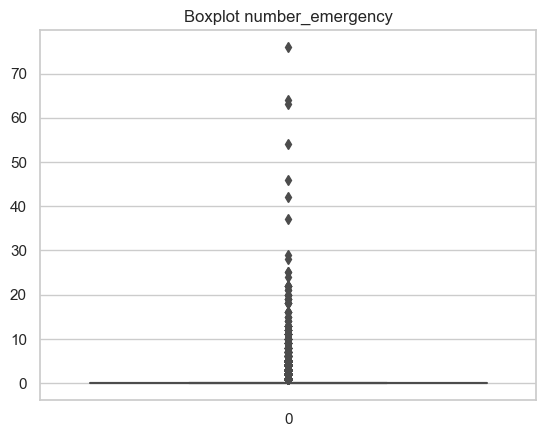

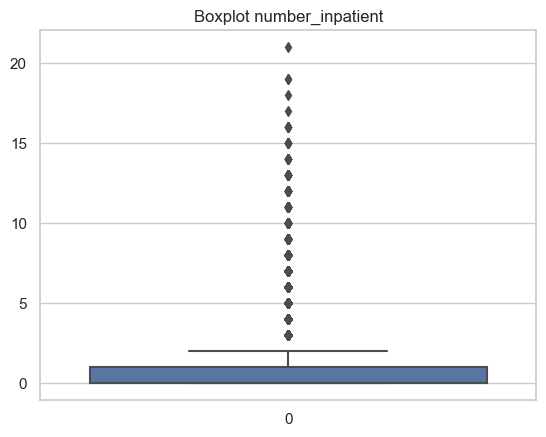

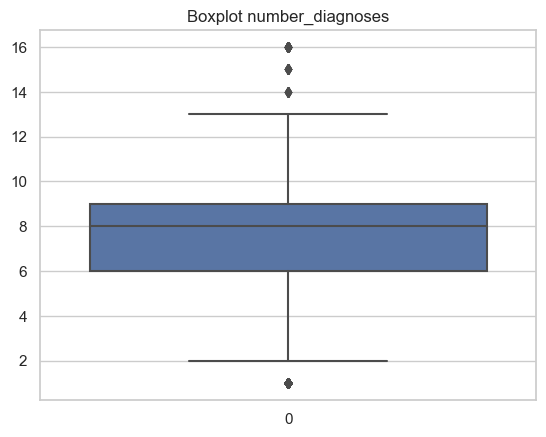

In [42]:
for column in diabetes.columns:
    if diabetes[column].dtype in [float, int, 'float64', 'int64']:
        plt.figure()
        # diabetes.boxplot([column])
        plt.title('Boxplot {}'.format(column))
        sns.boxplot(data=diabetes[column]) 

In [44]:
import matplotlib.pyplot as plt
int_column=[]
for column in diabetes.columns:
    if diabetes[column].dtype in [float, int, 'float64', 'int64']:
        int_column.append(column)
int_column.append('readmitted')
## Remove don't cardinality columns
int_column.remove('encounter_id')
int_column.remove('admission_type_id')
int_column.remove('discharge_disposition_id')
int_column.remove('admission_source_id')

In [48]:
int_column

['patient_nbr',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'readmitted']

The 'int_column' have distribution diferent betewwn readmitted and not readmmitted. Maybe this columns is relevant for prediction readmitted.

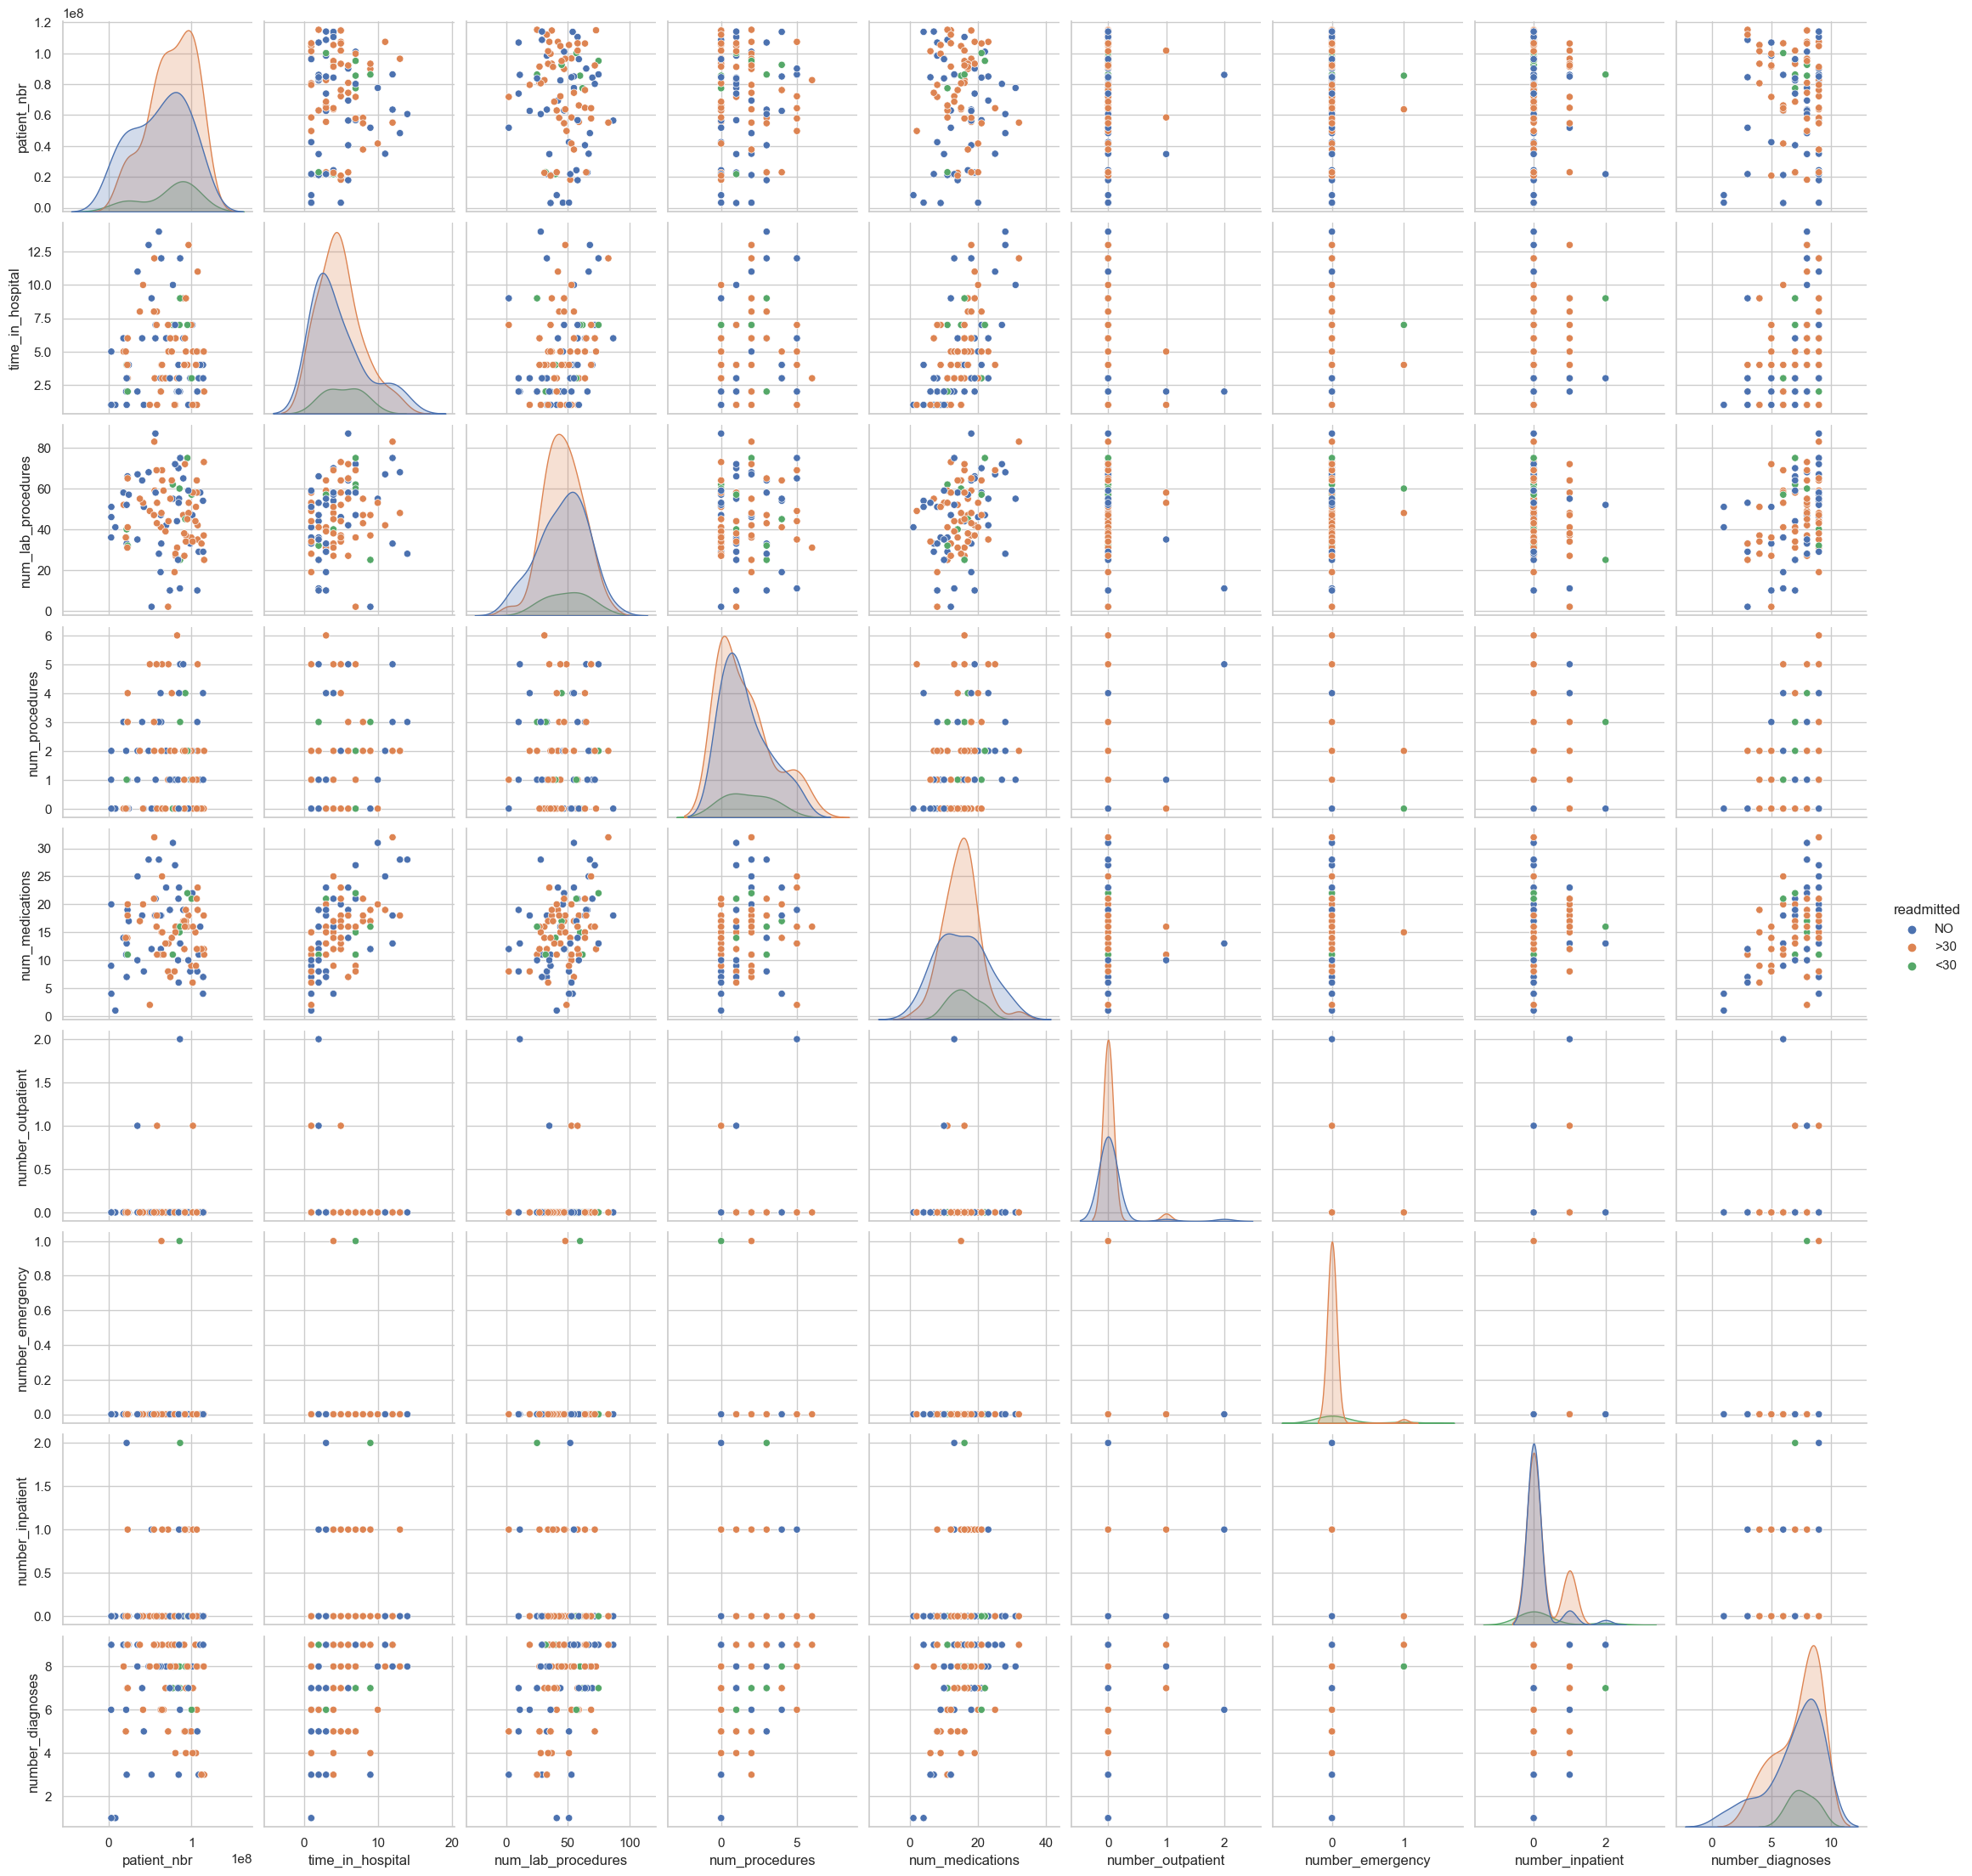

In [46]:
sns.set_style('whitegrid')
## Scatter plot for every column ralation and hue for readmitted
sns.pairplot(diabetes[int_column].head(100), hue = 'readmitted')

## Conclusions

> La variable a predecir, puede tener problemas de inbalanace, posibles soluciones son pasar de 3 a 2 categorias. O revisar algun control de inbalance.

> Es necesario revisar la columnas categoricas, con el fin de definir la mejor forma de usar (posibilidad de usar numericamente como cardinalidad)

> Algunas columnas tienen una cantidad muy alta de nulos, lo mejor seria eliminarlas del analsis.

> Los autliers son un riesgo latente en la muestra, parece que puede generar problemas en la prediccion.

> Algunas columnas como 'number_inpatient' pueden tener una alta capacidad predictiva, dado que distirminan bien la variables de salida.